To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Longest Path Problem

In this tutorial we will solve longest path problem using the Python library "NetworkX". 

First, let's start by importing the libraries.

In [2]:
import numpy as np
import networkx as nx

# Problem 02

An investor has started to evaluate four projects for investment. The costs and returns of the projects are known. However, the investor's resources are limited to 350. The investor wants to decide which projects should be invested in.

| Project | Cost | Return |
| :-----: | :--: | :----: |
| A | 180 | 260 |
| B | 250 | 370 |
| C | 170 | 245 |
| D | 210 | 300 |


The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

We will take the projects "A","B","C" and "D" as the stages of the problem, while the remaining fund will be the states of the problem.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("Start", {"color": "black"}),
    ("A350", {"color": "black"}), # do not invest in A (350-0=350)
    ("A170", {"color": "black"}), # invest in A (350-180=170)
    ("B350", {"color": "black"}),
    ("B100", {"color": "black"}),
    ("B170", {"color": "black"}),
    ("C350", {"color": "black"}),
    ("C180", {"color": "black"}),
    ("C100", {"color": "black"}),
    ("C170", {"color": "black"}),
    ("C0", {"color": "black"}),
    ("D350", {"color": "black"}),
    ("D140", {"color": "black"}),
    ("D180", {"color": "black"}),
    ("D100", {"color": "black"}),
    ("D170", {"color": "black"}),
    ("D0", {"color": "black"}),
    ("End", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "Start":np.array([0.0,0.0]),
    "A350":np.array([1.0,3.0]),
    "A170":np.array([1.0,-3.0]),
    "B350":np.array([2.0,3.0]),
    "B100":np.array([2.0,0.0]),
    "B170":np.array([2.0,-3.0]),
    "C350":np.array([3.0,3.0]),
    "C180":np.array([3.0,1.5]),
    "C100":np.array([3.0,0.0]),
    "C170":np.array([3.0,-1.5]),
    "C0":np.array([3.0,-3.0]),
    "D350":np.array([4.0,3.0]),
    "D140":np.array([4.0,2.0]),
    "D180":np.array([4.0,1.0]),
    "D100":np.array([4.0,0.0]),
    "D170":np.array([4.0,-1.0]),
    "D0":np.array([4.0,-2.0]),
    "End":np.array([5.0,0.0])
}

{('Start', 'A350'): Text(0.5, 1.5, '0'),
 ('Start', 'A170'): Text(0.5, -1.5, '80'),
 ('A350', 'B350'): Text(1.5, 3.0, '0'),
 ('A350', 'B100'): Text(1.5, 1.5, '120'),
 ('A170', 'B170'): Text(1.5, -3.0, '0'),
 ('B350', 'C350'): Text(2.5, 3.0, '0'),
 ('B350', 'C180'): Text(2.5, 2.25, '75'),
 ('B100', 'C100'): Text(2.5, 0.0, '0'),
 ('B170', 'C170'): Text(2.5, -2.25, '0'),
 ('B170', 'C0'): Text(2.5, -3.0, '75'),
 ('C350', 'D350'): Text(3.5, 3.0, '0'),
 ('C350', 'D140'): Text(3.5, 2.5, '90'),
 ('C180', 'D180'): Text(3.5, 1.25, '0'),
 ('C100', 'D100'): Text(3.5, 0.0, '0'),
 ('C170', 'D170'): Text(3.5, -1.25, '0'),
 ('C0', 'D0'): Text(3.5, -2.5, '0'),
 ('D350', 'End'): Text(4.5, 1.5, '0'),
 ('D140', 'End'): Text(4.5, 1.0, '0'),
 ('D180', 'End'): Text(4.5, 0.5, '0'),
 ('D100', 'End'): Text(4.5, 0.0, '0'),
 ('D170', 'End'): Text(4.5, -0.5, '0'),
 ('D0', 'End'): Text(4.5, -1.0, '0')}

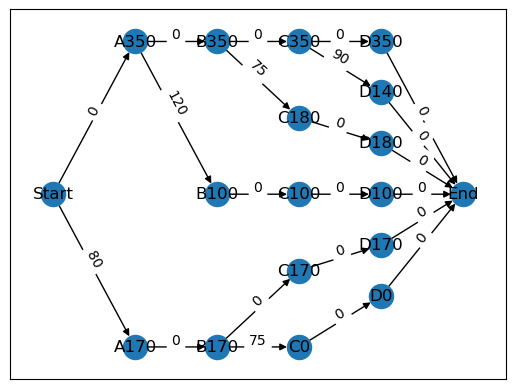

In [5]:
elist = [("Start", "A350"),
         ("Start", "A170"),
         ("A350", "B350"),
         ("A350", "B100"),
         ("A170", "B170"),
         ("B350", "C350"),
         ("B350", "C180"),
         ("B100", "C100"),
         ("B170", "C170"),
         ("B170", "C0"),
         ("C350", "D350"),
         ("C350", "D140"),
         ("C180", "D180"),
         ("C100", "D100"),
         ("C170", "D170"),
         ("C0", "D0"),
         ("D350", "End"),
         ("D140", "End"),
         ("D180", "End"),
         ("D100", "End"),
         ("D170", "End"),
         ("D0", "End")]
G1.add_edges_from(elist)
eattrs = {("Start", "A350"): {"weight": 0},
         ("Start", "A170"): {"weight": 80},
         ("A350", "B350"): {"weight": 0},
         ("A350", "B100"): {"weight": 120},
         ("A170", "B170"): {"weight": 0},
         ("B350", "C350"): {"weight": 0},
         ("B350", "C180"): {"weight": 75},
         ("B100", "C100"): {"weight": 0},
         ("B170", "C170"): {"weight": 0},
         ("B170", "C0"): {"weight": 75},
         ("C350", "D350"): {"weight": 0},
         ("C350", "D140"): {"weight": 90},
         ("C180", "D180"): {"weight": 0},
         ("C100", "D100"): {"weight": 0},
         ("C170", "D170"): {"weight": 0},
         ("C0", "D0"): {"weight": 0},
         ("D350", "End"): {"weight": 0},
         ("D140", "End"): {"weight": 0},
         ("D180", "End"): {"weight": 0},
         ("D100", "End"): {"weight": 0},
         ("D170", "End"): {"weight": 0},
         ("D0", "End"): {"weight": 0}}
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.5, verticalalignment = 'bottom')

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 18 nodes and 22 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	0
  (0, 2)	80
  (1, 3)	0
  (1, 4)	120
  (2, 5)	0
  (3, 6)	0
  (3, 7)	75
  (4, 8)	0
  (5, 9)	0
  (5, 10)	75
  (6, 11)	0
  (6, 12)	90
  (7, 13)	0
  (8, 14)	0
  (9, 15)	0
  (10, 16)	0
  (11, 17)	0
  (12, 17)	0
  (13, 17)	0
  (14, 17)	0
  (15, 17)	0
  (16, 17)	0


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[  0   0  80   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 120   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  75   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  75   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  90   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [9]:
path = nx.dag_longest_path(G1, weight = 'weight')
print(path)

['Start', 'A170', 'B170', 'C0']


In [10]:
totalprofit = nx.dag_longest_path_length(G1, weight = 'weight')
print(totalprofit)

155
